In [645]:
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

## Key generation

In [436]:
def random_prime(d = 32):
    # generate a large prime number randomly
    # Simple method
    # Consider Miller–Rabin and Solovay–Strassen primality test
    n = random.randint(2, 2**d - 1)
    
    # Preliminary Test
    while n % 2 == 0 or n % 3 == 0:
        n = random.randint(2, 2**d - 1)
    
    # Iterative Test
    while True:
        i = 5
        while i*i <= n:
            if n % i == 0 or n % (i + 2) == 0:
                break
            i += 6

        if i*i <= n:
            n += 2
            while n % 2 == 0 or n % 3 == 0:
                n += 2
            continue
        else:
            break

    return n

def gcd(x, y):
    if x < y:
        x, y = y, x
    
    while not x - y == 0:
        x = x - y
        if x < y:
            x, y = y, x        
    
    return x  

def random_coprime(n):
    # find e, which satisfies gcd(n, e) = 1. 1 < e < n
    
    # Can't do this, memory overflow
    #e_seq = np.random.permutation(np.arange(2, n))
        
    e = random.randint(2, n - 1)
    
    while not gcd(n, e) == 1:
        if e == n - 1:
            e = random.random.randint(2, n -1)
        else:
            e = e + 1
        
    return e


def eea(r0, r1):
    # find the inverse of e under the modular base phi_n
    if r0 < r1:
        r0, r1 = r1, r0
    
    if r1 == 1:
        return 1
    
    if r0 % r1 == 0:
        return None
    
    n = r0
    
    s0 = 1; t0 = 0; s1 = 0; t1 = 1   
    q0 = 0; q1 = int(r0 / r1)
    
    while True:
        r2 = r0 % r1
        q2 = int(r1 / r2)
        s2 = s0 - q1*s1
        t2 = t0 - q1*t1

        if r2 == 1:
            if t2 < 0: 
                return t2 + n
            else:
                return t2
        else:
            r0 = r1; q0 = q1; s0 = s1; t0 = t1
            r1 = r2; q1 = q2; s1 = s2; t1 = t2

In [551]:
def key_generation(d = 32):
    p = random_prime(d)
    q = random_prime(d)

    while p == q:
        q = random_prime(d)

    n = p * q
    phi_n = ( p - 1 )*(q - 1)

    e = random_coprime(phi_n)

    d = eea(e, phi_n)
    
    return p, q, n, phi_n, e, d

In [289]:
key_generation()

(1342866179,
 2120886121,
 2848066241401401659,
 2848066237937649360,
 1987403942331748541,
 1861923019237530341)

## Encryption

In [750]:
def fast_expontiation(plain_text:int, key:int, n = None):
    # realize the fast expontiation algorithm
#     if type(key) is int:
    key_seq = int_to_list(key)
    
    answer = plain_text
    
    for i in range(1, len(key_seq)):
        answer = (answer ** 2) % n
#         answer = moduloMultiplication(answer, answer, n)
        if key_seq[i] == 1:
            answer = (answer * plain_text) % n
#             answer = moduloMultiplication(answer, plain_text, n)
 
    return answer

def int_to_list(n:int):
    lst = []

    while n > 0:
        lst.append(n & 1)
        n = n >> 1
    
    lst.reverse()
    
    return lst
    
def list_to_int(lst:list):
    n = 0
    
    lst.reverse()
    
    for i in range(0, len(lst)):
        n = n + lst[i] * (2**i)
    
    return n

# def moduloMultiplication(a, b, mod): 
  
#     res = 0; # Initialize result 
  
#     # Update a if it is more than 
#     # or equal to mod 
#     a = a % mod; 
  
#     while (b): 
      
#         # If b is odd, add a with result 
#         if (b & 1): 
#             res = (res + a) % mod; 
              
#         # Here we assume that doing 2*a 
#         # doesn't cause overflow 
#         a = (2 * a) % mod; 
  
#         b >>= 1; # b = b / 2 
      
#     return res; 

In [578]:
def encryption(plain_text, n, key):
    
#     cipher = (plain_text ** key) % n
    
    exponent = fast_expontiation(plain_text, key, n)    
    cipher = exponent % n
    
    return cipher

## Decryption

In [768]:
def decryption(cipher, n, key):
    
#     plain_text = (cipher ** key) % n

    exponent = fast_expontiation(cipher, key, n)    
    plain_text = exponent % n
    
    return plain_text

def decryption_CRT(cipher, p, q, d):
    
    plain_text = chinese_remainder_theorem(cipher, p, q, d)
    
    return plain_text

In [760]:
def chinese_remainder_theorem(C, p, q, d):
    # realize CRT algorithm
    
    dp = d % (p-1)
    dq = d % (q-1)
    Cp = C % p
    Cq = C % q
    
    a1 = fast_expontiation(Cp, dp, p)
    a2 = fast_expontiation(Cq, dq, q)
    
    qp = eea(q % p, p)
    pq = eea(p % q, q)
    
    P = (a1*q*qp + a2* p* pq) % (p * q)
    
    return P

## Test

In [771]:
p, q, n, phi_n, e, d = key_generation(48)

plain_text = random.randint(0, n-1)

cipher = encryption(plain_text, n, e)

print(plain_text)
print(cipher)

decrpt_text = decryption(cipher, n, d)

print(decrpt_text)

decrpt_text_crt = decryption_CRT(cipher, p, q, d)

print(decrpt_text_crt)

30729423161387000702243401599
19385095133637593901073469614
30729423161387000702243401599
30729423161387000702243401599


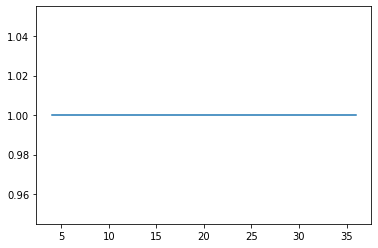

In [755]:
s = []
for j in range(4, 37):
    sum = 0
    for i in range(0, 100):
        digit = j
        p, q, n, phi_n, e, d = key_generation(digit)
        base = n
        pri = e
        pub = d

        plain_text = random.randint(0, n-1)

        cipher = encryption(plain_text = plain_text, key = pri, n = base)


        decrypt_text = decryption(cipher=cipher, key=pub, n=base)
    #     print("cipher: "  + str(cipher))
    #     print("plain text: " + str(plain_text))
    #     print("result: " + str(decrypt_text))
    #     print("n: " + str(n))
    #     print(len(int_to_list(n)))
    #     print(len(int_to_list(plain_text)))
        if decrypt_text == plain_text:
            sum += 1
        else:
            pass
    #         print((p, q, n, e, d, plain_text))
    #         print(all([p*q == n, (p-1)*(q-1)==phi_n, gcd(e, phi_n) == 1, gcd(d,phi_n) == 1, 
    #                   (d*e) % phi_n == 1]))
    #         break
    s.append(sum/100)

plt.plot(np.arange(4, 37), s)

In [754]:
sum = 0
n_seq = []
for i in range(0, 100):
    digit = 27
    p, q, n, phi_n, e, d = key_generation(digit)
    base = n
    pri = e
    pub = d

    plain_text = random.randint(0, n-1)

    cipher = encryption(plain_text = plain_text, key = pri, n = base)


    decrypt_text = decryption(cipher=cipher, key=pub, n=base)
#     print("cipher: "  + str(cipher))
#     print("plain text: " + str(plain_text))
#     print("result: " + str(decrypt_text))
#     print("n: " + str(n))
#     print(len(int_to_list(n)))
#     print(len(int_to_list(plain_text)))
    if decrypt_text == plain_text:
        sum += 1
    else:
        break
#         print((p, q, n, e, d, plain_text))
#         print(all([p*q == n, (p-1)*(q-1)==phi_n, gcd(e, phi_n) == 1, gcd(d,phi_n) == 1, 
#                   (d*e) % phi_n == 1]))
#         break
    n_seq.append(len(int_to_list(n)))
print(sum/100)

1.0


In [763]:
digit = 27
p, q, n, phi_n, e, d = key_generation(digit)
base = n
pri = e
pub = d

plain_text = random.randint(0, n-1)

cipher = encryption(plain_text = plain_text, key = pri, n = base)

decrypt_text = decryption(cipher=cipher, key=pub, n=base)
decrypt_crt = decryption_CRT(cipher = cipher, n = n, p = p, q = q, phi_n = phi_n)
print(decrypt_text)
print(decrypt_crt)

736452606376590
736452606376590


In [696]:
len(int_to_list(n)) + len(int_to_list(plain_text))



107